In [298]:
### OBTAIN BIDIRECTIONALLY CONNECTED NEURONS ### 
import numpy as np
probe1_371 = np.loadtxt("results/connectivity_Cori_2016-12-14_probe1/W_py_5400.csv", delimiter=",")

# get tuples of connected neurons
ai,bi = np.where(abs(probe1_371) != 0)
index_pairs = list(zip(ai,bi))

with open("birirectionally.txt", 'w') as f:
    bidirectionally = []
    for (r,t) in index_pairs:
        if (t,r) in index_pairs and (t,r) not in bidirectionally:
            bidirectionally.append((r,t))
            f.write(str(t) + " " + str(r) + "\n")


[(1, 343), (2, 141), (2, 227), (2, 288), (2, 310), (2, 312), (2, 325), (2, 326), (2, 337), (2, 369), (3, 252), (3, 317), (4, 31), (4, 32), (4, 140), (4, 252), (4, 317), (6, 22), (7, 160), (7, 239), (8, 60), (8, 132), (8, 183), (8, 237), (8, 276), (9, 213), (10, 323), (11, 168), (12, 13), (12, 80), (12, 81), (12, 107), (12, 111), (12, 151), (12, 161), (12, 211), (12, 223), (12, 262), (12, 334), (13, 19), (13, 107), (13, 119), (13, 357), (14, 326), (14, 337), (14, 340), (15, 292), (15, 297), (15, 298), (16, 307), (17, 32), (17, 42), (17, 192), (17, 249), (17, 252), (17, 317), (17, 360), (18, 229), (19, 22), (19, 46), (19, 227), (19, 335), (19, 343), (19, 369), (20, 22), (20, 37), (20, 54), (20, 81), (20, 157), (20, 172), (20, 191), (20, 207), (20, 237), (20, 278), (21, 317), (22, 28), (22, 66), (22, 100), (22, 123), (22, 129), (22, 143), (22, 183), (22, 220), (22, 324), (22, 326), (25, 213), (27, 96), (28, 36), (28, 37), (28, 46), (28, 66), (28, 84), (28, 102), (28, 111), (28, 126), (28,

In [296]:
probe1_371[301, 298]

-0.185105

In [55]:
### COMPUTE MIN NUMBER OF STATE OCCURRENCES in each BIDIRECTIONALLY CONNECTED pair ### 
from temporal_emergence import TPMMaker 
import numpy as np
folder = "GLMCC/Cori_2016-12-14_probe1"

### OBTAIN BIDIRECTIONALLY CONNECTED NEURONS ### 

probe1_371 = np.loadtxt("results/connectivity_Cori_2016-12-14_probe1/W_py_5400.csv", delimiter=",")

# get tuples of connected neurons
ai,bi = np.where(abs(probe1_371) != 0)
index_pairs = list(zip(ai,bi))

bidirectionally = []
for (r,t) in index_pairs:
    if (t,r) in index_pairs and (t,r) not in bidirectionally:
        bidirectionally.append((r,t))
"""
### COMPUTE MIN OCCURRENCES ### 
### PARAMETERS ###

NUM_BITS = 2

max_binsize = 0.02  # 20 ms bins
min_binsize = 0.0029 # skip 1ms bins  -   never work and are very slow to compute
num_binsizes = 9
binsizes = np.linspace(min_binsize, max_binsize, num_binsizes)

min_num_occurrences = np.zeros((len(bidirectionally), len(binsizes)))


for p in range(len(bidirectionally)):
    i,j = bidirectionally[p]
    ### LOAD DATASET ###

    i_sec = np.loadtxt(folder + "/cell" + str(i) + ".txt") / 1000   # divide through as they are loaded in seconds
    j_sec = np.loadtxt(folder + "/cell" + str(j) + ".txt") / 1000
    cluster = np.array([i_sec, j_sec])

    ### PARAMETERS ###
    skips = list(range(2,11,2))
    max_binsize = 0.02  # 50 ms bins
    min_binsize = 0.0029 # 1ms bins  -   probably won't work
    num_binsizes = 9
    binsizes = np.linspace(min_binsize, max_binsize, num_binsizes)

    ### LOOP THROUGH PARAMETERS, computing min of state occurrences ###
    for k in range(len(binsizes)):
        binsize = binsizes[k]
        min_occ = np.min(TPMMaker.get_num_state_occurrences(cluster,binsize, NUM_BITS, 0))   # keep skip at 0, it's not actually used
        min_num_occurrences[p,k] = min_occ
"""

'\n### COMPUTE MIN OCCURRENCES ### \n### PARAMETERS ###\n\nNUM_BITS = 2\n\nmax_binsize = 0.02  # 20 ms bins\nmin_binsize = 0.0029 # skip 1ms bins  -   never work and are very slow to compute\nnum_binsizes = 9\nbinsizes = np.linspace(min_binsize, max_binsize, num_binsizes)\n\nmin_num_occurrences = np.zeros((len(bidirectionally), len(binsizes)))\n\n\nfor p in range(len(bidirectionally)):\n    i,j = bidirectionally[p]\n    ### LOAD DATASET ###\n\n    i_sec = np.loadtxt(folder + "/cell" + str(i) + ".txt") / 1000   # divide through as they are loaded in seconds\n    j_sec = np.loadtxt(folder + "/cell" + str(j) + ".txt") / 1000\n    cluster = np.array([i_sec, j_sec])\n\n    ### PARAMETERS ###\n    skips = list(range(2,11,2))\n    max_binsize = 0.02  # 50 ms bins\n    min_binsize = 0.0029 # 1ms bins  -   probably won\'t work\n    num_binsizes = 9\n    binsizes = np.linspace(min_binsize, max_binsize, num_binsizes)\n\n    ### LOOP THROUGH PARAMETERS, computing min of state occurrences ###\n    

In [93]:
## GET THE PHIS FOR A PARTICULAR NEURON PAIR
import numpy as np
from temporal_emergence import TPMMaker, PhiCalculator
def get_phis(ref, tar, num_transitions, infolder, outfolder):
    ### LOAD DATASET ###

    i_sec = np.loadtxt(infolder + "/cell" + str(ref) + ".txt") / 1000   # divide through as they are loaded in miliseconds
    j_sec = np.loadtxt(infolder + "/cell" + str(tar) + ".txt") / 1000
    cluster = np.array([i_sec, j_sec])

    ### COMPUTE PHIS ###

    NUM_BITS = 2

    max_binsize = 0.02  # 20 ms bins
    min_binsize = 0.001 # skip 1ms bins  -   never work and are very slow to compute
    num_binsizes = 10
    binsizes = np.linspace(min_binsize, max_binsize, num_binsizes)


    micro_phis = np.zeros((len(binsizes), len(skips)))
    macro_phis = np.zeros((len(binsizes), len(skips)))

    for i in range(len(binsizes)):
        binsize = binsizes[i]
        for j in range(len(skips)):
            skip = skips[j]

            try:
                TPM,_ = TPMMaker.TPM_from_spiketrains(cluster,binsize,NUM_BITS,skip,num_transitions)
                tpmname = "micro_" + str(i) + "_" + str(j) + "_occs_" + str(num_transitions) + "_bin_"+str(binsize)+"_skip_"+str(skip)+".csv" 
                np.savetxt(outfolder+"/"+tpmname, TPM)
                success = True
            except:
                success = False
                print("Failed for binsize: " + str(binsize) + " and skip: " + str(skip))
            
            if success:
                micro_phis[i,j] = PhiCalculator.get_micro_average_phi(TPM, verbose=False)
                macro_phis[i,j] = PhiCalculator.get_macro_average_phi(TPM, verbose=False)
                print("Success for binsize: " + str(binsize) + " and skip: " + str(skip))
            
            else:
                micro_phis[i,j] = None
                macro_phis[i,j] = None
    
    micro_phis = np.array(micro_phis, dtype=np.float64)
    macro_phis = np.array(macro_phis, dtype=np.float64)
    
    max_micro = np.nanmax(micro_phis)
    max_macro = np.nanmax(macro_phis)
    macro_win = True if max_macro > max_micro else False

    return macro_win

get_phis(143, 168, 200, "GLMCC/Cori_2016-12-14_probe1", "results")

/Users/Marcel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':
Failed for binsize: 0.001 and skip: 2
Failed for binsize: 0.001 and skip: 4
Failed for binsize: 0.001 and skip: 6
Failed for binsize: 0.001 and skip: 8
Failed for binsize: 0.001 and skip: 10
Success for binsize: 0.003111111111111111 and skip: 2
Success for binsize: 0.003111111111111111 and skip: 4
Success for binsize: 0.003111111111111111 and skip: 6
Success for binsize: 0.003111111111111111 and skip: 8
Success for binsize: 0.003111111111111111 and skip: 10
Success for binsize: 0.005222222222222222 and skip: 2
Success for binsize: 0.005222222222222222 and skip: 4
Success for binsize: 0.005222222222222222 and skip: 6
Succe

KeyboardInterrupt: 

In [ ]:
### FOR PAIR 143, 168, REPEATEDLY COMPUTE PHIS FOR DIFFERENT NUMBER OF MIN OCCURRENCES,
### TO SEE PROPORTION OF MACRO WINS AT DIFFERENT NUMBERS OF MIN OCCURRENCES

NUM_BITS = 2

max_binsize = 0.02  # 20 ms bins
min_binsize = 0.0029 # skip 1ms bins  -   never work and are very slow to compute
num_binsizes = 9
binsizes = np.linspace(min_binsize, max_binsize, num_binsizes)

occurrences = range(100, 1100, 100)
NUM_REPETITIONS = 100

outfolder = "TPM_143_168_varying_min_occs"

### REPEATEDLY COMPUTE PHIS AND SEE IF MACRO WINS, FOR VARIOUS MIN NUMBER OF REPETITIONS
macro_wins = np.zeros((len(occurrences)))
for i in range(len(occurrences)):
    min_occurrence = occurrences[i]
    for rep in range(NUM_REPETITIONS):
        macro_win = get_phis(min_occurrence, outfolder)
        if macro_win:
            macro_wins[i] += 1

macro_wins_pct = macro_wins / NUM_REPETITIONS


(9, 736)

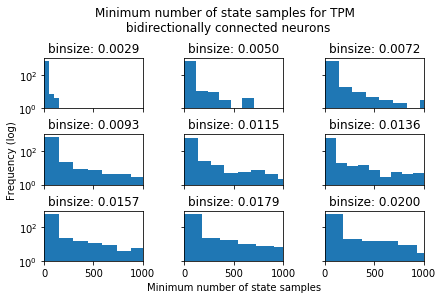

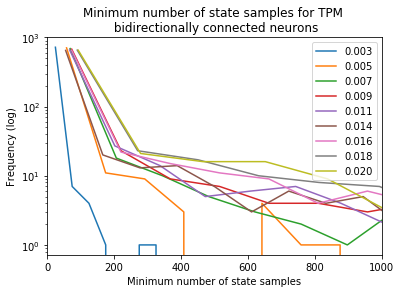

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

minimal_connections = np.load("results/min_occurrences.npy", allow_pickle=True)
minimal_connections = [conn[2] for conn in minimal_connections]

max_binsize = 0.02  # 20 ms bins
min_binsize = 0.0029 # skip 1ms bins  -   never work and are very slow to compute
binsize = np.linspace(min_binsize, max_binsize, 9)
minimal_connections = np.transpose(minimal_connections)
fig, ax = plt.subplots(3,3)
fig.suptitle('Minimum number of state samples for TPM \n bidirectionally connected neurons')
fig.tight_layout()
plt.grid(False)
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.ylabel("Frequency (log)")
plt.xlabel("Minimum number of state samples")

for i in range(3):
    for j in range(3):
        #plt.figure()
        ax[i,j].hist(minimal_connections[i*3 + j], bins = 25)
        ax[i,j].set_yscale('log')
        ax[i,j].set_xlim([0, 1000])
        ax[i,j].set_ylim([1, 10**3])
        ax[i,j].set_title("binsize: " + '%.4f' % (binsize[i*3 + j]))
plt.subplots_adjust(top=0.8)

for ax in fig.get_axes():
    ax.label_outer()

plt.figure()
for i in range(minimal_connections.shape[0]):
    h,x = np.histogram(minimal_connections[i], bins=25)
    bin_centers = 0.5*(x[1:]+x[:-1])
    plt.plot(bin_centers,h, label='%.3f' % (binsize[i]))
    plt.yscale('log')
    plt.xlim([0,1000])
    plt.ylabel("Frequency (log)")
    plt.xlabel("Minimum number of state samples")
    plt.title('Minimum number of state samples for TPM \n bidirectionally connected neurons')
    plt.legend()
minimal_connections.shape

In [141]:
### LOAD SUPERCOMPUTER DATA ON MACRO/MICRO WINS for 143/168
macro_wins_143_168 = np.load("results/n143_168_macrowins.npy")
micro_macros_bidirectionally = np.load("results/n143_168_macro_micros.npy")

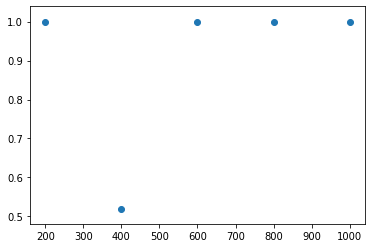

In [138]:
### PLOT MACRO WIN PROBABILITIES
win_probs = np.zeros((5,1))
for (win, loc) in macro_wins_143_168:
    if win:
        win_probs[loc//200 - 1] += 1
win_probs = win_probs/50

plt.scatter([200,400,600,800,1000], win_probs)

In [263]:
all_coarsegrains = np.load("results/all_coarsegrains_macro_micros.npy", allow_pickle=True)

array([[array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]]),
        array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]]),
        (1, 343)],
       [array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]]),
        array([[nan, nan, nan, na

In [285]:
### PLOT PHI diffs for bidirectionally connected neurons
diffs = []
max_micros = []
max_macros = []
max_diff_ind, max_diff = 0, 0
for i in range(all_coarsegrains.shape[0]):
    max_micro = np.nanmax(all_coarsegrains[i,0])
    max_macro = np.nanmax(all_coarsegrains[i,1])
    if all_coarsegrains[i,2] == (143,168):
        print(i)
    d = max_macro - max_micro
    diffs.append(d)
    max_micros.append(max_micro)
    max_macros.append(max_macro)

    if d > max_diff:
        max_diff_ind, max_diff = i, d
    



485
/Users/Marcel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN slice encountered
  import sys
/Users/Marcel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  


(298, 301)


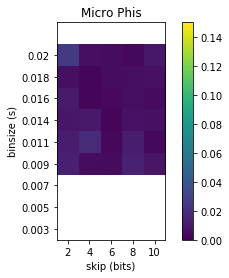

<Figure size 432x288 with 0 Axes>

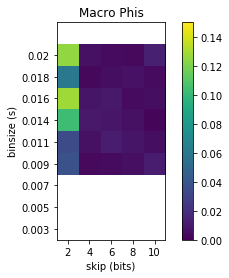

In [293]:
print(all_coarsegrains[max_diff_ind, 2])
macro_phis = all_coarsegrains[max_diff_ind, 1]
micro_phis = all_coarsegrains[max_diff_ind, 0]

skips_corrected = list(range(2,11,2))

max_binsize = 0.02  # 20 ms bins
min_binsize = 0.0029 # skip 1ms bins  -   never work and are very slow to compute
num_binsizes = 9
binsizes = np.linspace(min_binsize, max_binsize, num_binsizes)

fig, ax = plt.subplots()

plt.imshow(micro_phis, vmin=0, vmax=0.15)
plt.title("Micro Phis")
plt.xlabel("skip (bits)")
plt.xticks(ticks=range(len(skips_corrected)), labels=skips_corrected)

plt.ylabel("binsize (s)")
roundedbinsizes = np.round(binsizes, 3)
plt.yticks(ticks=range(len(binsizes)), labels=roundedbinsizes)
ax.set_ylim(-0.5, 9.5)

plt.colorbar()


plt.figure()
fig, ax = plt.subplots()

plt.imshow(macro_phis, vmin=0, vmax=0.15)
plt.title("Macro Phis")
plt.xlabel("skip (bits)")
plt.xticks(ticks=range(len(skips_corrected)), labels=skips_corrected)

plt.ylabel("binsize (s)")
roundedbinsizes = np.round(binsizes, 3)
plt.yticks(ticks=range(len(binsizes)), labels=roundedbinsizes)
ax.set_ylim(-0.5, 9.5)

plt.colorbar()



In [311]:
# STATISTICAL TESTS BETWEEN MACRO AND MICRO PHIS
"""Theory
Assume, for the null hypothesis, that for each neuron, the max phi value at the macro scale is 
equal to the max phi value at the micro scale. 
=> the average max phi at the macro scale = average max phi at the micro scale, for the average of all neurons.  

What is the p value at which we have to disprove this? 
"""

from scipy.stats import ttest_ind, wilcoxon
s, p = wilcoxon(max_macros, max_micros)
print(p * 15)


4.4563222803838096e-120


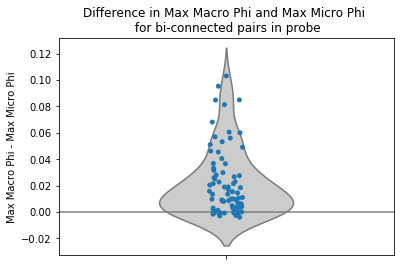

In [269]:
import seaborn as sns
diffs = np.array(diffs)
diffs = diffs[~np.isnan(diffs)]
ax = sns.violinplot(diffs, orient='v', color=".8", inner=None, width=0.4)
ax = sns.stripplot(diffs, orient='v',jitter=0.05)
plt.ylabel("Max Macro Phi - Max Micro Phi")
plt.title("Difference in Max Macro Phi and Max Micro Phi \n for bi-connected pairs in probe")
plt.axhline(y=0, color='gray', linestyle='-')

(-0.03, 0.17)

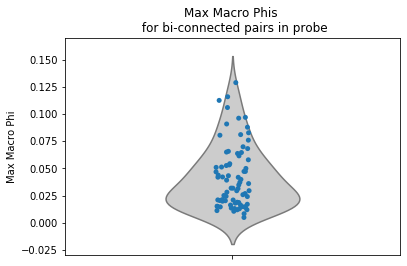

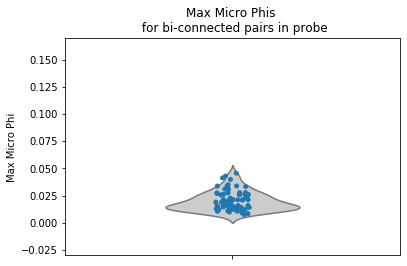

In [268]:

macros = np.array(max_macros)
macros = macros[~np.isnan(macros)]

micros = np.array(max_micros)
micros = micros[~np.isnan(micros)]


In [23]:
def violinplot_macro(macros, lims, title):
    plt.figure()
    ax = sns.violinplot(macros, orient='v', color=".8", inner=None, width=0.4)
    ax = sns.stripplot(macros, orient='v',jitter=0.05)
    plt.ylabel("Max Macro Phi")
    plt.title("Max Macro Phis \n for bi-connected pairs in probe\nfor coarse graining n: " + str(title))
    #plt.ylim([-0.03,0.17])

In [63]:
# same as above, but for 16 coarse grainings
import numpy as np
all_16_macro_micros_bidir = np.load("results/all_16coarsegrains_macro_micros.npy", allow_pickle=True)
all_16_macro_micros_disconnected = np.load("results/all_16coarsegrains_macro_micros_disconnected.npy", allow_pickle=True)
all_16_macro_micros_disconnected_random = np.load("results/all_16coarsegrains_macro_micros_disconnected_random.npy", allow_pickle=True)
all_16_macro_micros_disconnected_random_500 = np.load("results/all_16coarsegrains_macro_micros_disconnected_500.npy", allow_pickle=True)

In [64]:
# Get the maximums for each coarse graining
max_micros_wnan = []
max_macros_wnan = [[] for i in range(16)]

for micros,macros,(i,j) in all_16_macro_micros_disconnected_random_500:
    max_micros_wnan.append(np.nanmax(micros))
    max_macro = np.nanmax(macros, axis=(0,1))
    for m in range(len(max_macro)):
        max_macros_wnan[m].append(max_macro[m])

ipykernel_launcher:6: RuntimeWarning: All-NaN slice encountered
ipykernel_launcher:7: RuntimeWarning: All-NaN slice encountered


In [65]:
# get non_nan maxes
max_micros = np.array(max_micros_wnan)
print([i for i, x in enumerate(~np.isnan(max_micros)) if x])
max_micros = max_micros[~np.isnan(max_micros)]

max_macros = [np.array(m_mac) for m_mac in max_macros_wnan]
max_macros = [m_mac[~np.isnan(m_mac)] for m_mac in max_macros]

[64, 82, 84, 85, 102, 124, 125, 147, 163, 178, 179, 185, 186, 218, 219, 262, 274, 280, 307, 309, 338, 339, 345, 353, 367, 425, 433, 439, 505, 546, 550, 556, 576, 593, 597, 607, 633, 639, 641, 647, 701, 729, 730, 731, 732]


In [66]:
print(len(max_micros))

45


Text(0.5, 1.0, 'Max Micro Phis \n for disconnected connected pairs in probe\nneurons sampled from bi-connected group')

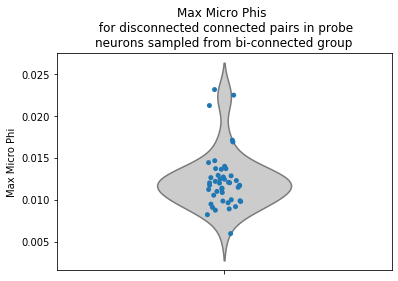

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.violinplot(max_micros, orient='v', color=".8", inner=None, width=0.4)
ax = sns.stripplot(max_micros, orient='v',jitter=0.05)
plt.ylabel("Max Micro Phi")
plt.title("Max Micro Phis \n for disconnected connected pairs in probe\nneurons sampled from bi-connected group")
#plt.ylim([-0.03,0.17])


(-0.05, 0.15)

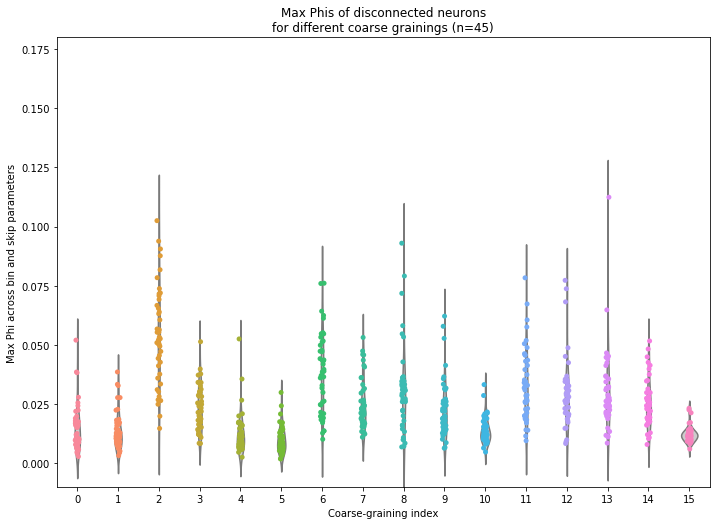

<Figure size 432x288 with 0 Axes>

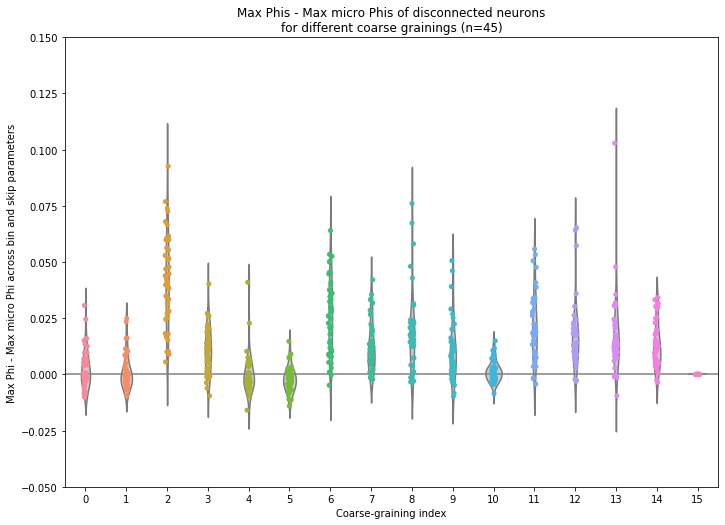

In [39]:
import pandas as pd
df = pd.DataFrame(np.transpose(max_macros))
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.violinplot(ax=ax,data=df, orient='v', color=".8", inner=None, width=0.4)
ax = sns.stripplot(ax=ax,data=df, orient='v',jitter=0.05)
plt.xlabel("Coarse-graining index")
plt.ylabel("Max Phi across bin and skip parameters")
plt.title("Max Phis of disconnected neurons\nfor different coarse grainings (n=45)")
plt.ylim([-0.01, 0.18])
plt.figure()
fig, ax = plt.subplots(figsize=a4_dims)
df2 = pd.DataFrame(np.transpose([max_macro - max_micros for max_macro in max_macros]))
ax = sns.violinplot(ax=ax,data=df2, orient='v', color=".8", inner=None, width=0.4)
ax = sns.stripplot(ax=ax,data=df2, orient='v',jitter=0.05)
plt.axhline(y=0, color='gray', linestyle='-')
plt.xlabel("Coarse-graining index")
plt.ylabel("Max Phi - Max micro Phi across bin and skip parameters")
plt.title("Max Phis - Max micro Phis of disconnected neurons\nfor different coarse grainings (n=45)")
plt.ylim([-0.05, 0.15])



In [31]:
#max of all macros
sup_macros = []
for i in range(len(max_macros[0])):
    sup_macros.append(max([max_macros[j][i] for j in range(len(max_macros)-1)]))


In [32]:
len(sup_macros)

18

(-0.02, 0.18)

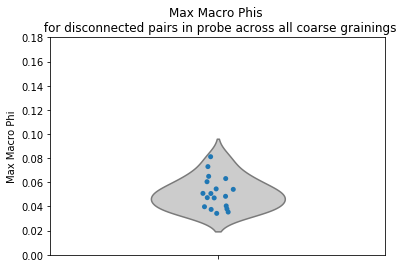

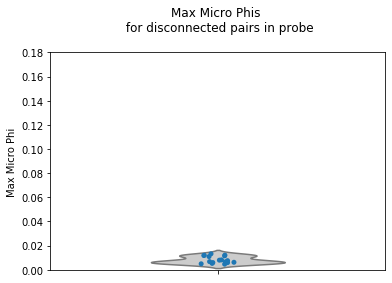

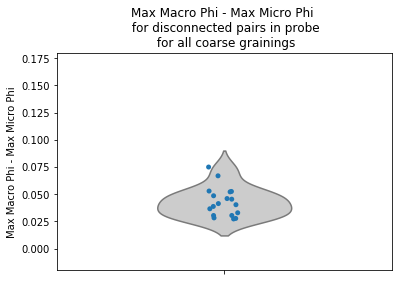

In [33]:
# plot the max of all macro coarse grainings
ax = sns.violinplot(sup_macros, orient='v', color=".8", inner=None, width=0.4)
ax = sns.stripplot(sup_macros, orient='v',jitter=0.05)
plt.ylabel("Max Macro Phi")
plt.title("Max Macro Phis \n for disconnected pairs in probe across all coarse grainings")
plt.ylim([0,0.18])
plt.figure()


ax = sns.violinplot(max_micros, orient='v', color=".8", inner=None, width=0.4)
ax = sns.stripplot(max_micros, orient='v',jitter=0.05)
plt.ylabel("Max Micro Phi")
plt.title("Max Micro Phis \n for disconnected pairs in probe\n")
plt.ylim([0,0.18])

plt.figure()

ax = sns.violinplot(sup_macros - max_micros, orient='v', color=".8", inner=None, width=0.4)
ax = sns.stripplot(sup_macros - max_micros, orient='v',jitter=0.05)
plt.ylabel("Max Macro Phi - Max Micro Phi")
plt.title("Max Macro Phi - Max Micro Phi \n for disconnected pairs in probe\n for all coarse grainings")
plt.ylim([-0.02,0.18])



(232, 269)


array([[       nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan],
       [0.0152705 , 0.0059345 , 0.00820344, 0.00966831, 0.00440212],
       [0.01152431, 0.010693  , 0.00478469, 0.00435694, 0.00923819],
       [0.01580031, 0.01112775, 0.00847588, 0.00391938, 0.01167456],
       [0.0076865 , 0.01622438, 0.02253081, 0.00807369, 0.0040305 ],
       [0.015738  , 0.01076706, 0.00720081, 0.00637331, 0.01260675],
       [0.00762694, 0.01547075, 0.00869119, 0.00604513, 0.00408981],
       [0.01680825, 0.00821444, 0.01312788, 0.00756544, 0.00402212]])

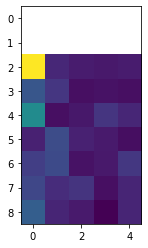

In [120]:
# get the neuron pair with highest difference between macro and micro phi
a = np.nanargmax(max_macros_wnan)
index = all_16_macro_micros_bidir[a][2]
probe1_371 = np.loadtxt("results/connectivity_Cori_2016-12-14_probe1/W_py_5400.csv", delimiter=",")

plt.imshow(all_16_macro_micros_bidir[a][1][:,:,0])
print(index)

Computing concepts:   0%|          | 0/3 [00:00<?, ?it/s]════════════════════════════════════════════════════════════
            Cause-effect structure (3 concepts)             
════════════════════════════════════════════════════════════
  ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
           Concept: Mechanism = [A], φ = 0.094121           
  ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  
              MIC                         MIE               
  ┌──────────────────────────┐┌──────────────────────────┐  
  │  φ = 0.094121            ││  φ = 0.155497            │  
  │  Purview = [B]           ││  Purview = [B]           │  
  │  MIP:                    ││  MIP:                    │  
  │     A     ∅              ││     A     ∅              │  
  │    ─── ✕ ───             ││    ─── ✕ ───             │  
  │     ∅     B              ││     ∅     B              │  
  │  Repertoire:             ││  Repertoire:             │  
  │    ┌────────────────┐   

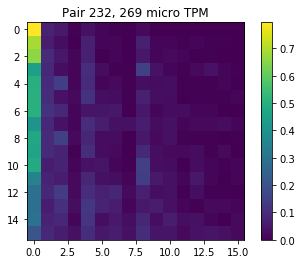

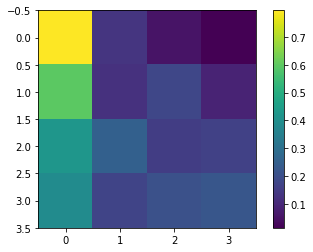

In [23]:
# tpm of this super phi
from temporal_emergence import CoarseGrainer, PhiCalculator, Helpers
import pyphi
import numpy as np
import matplotlib.pyplot as plt
import jupyter
jupyter.textOutputLimit = 0
TPM_max_phi = np.loadtxt("results/n143_168_macro_micros/micro_232_269_occs_200_bin_0.007175_skip_2.csv")
plt.imshow(TPM_max_phi)
plt.title("Pair 232, 269 micro TPM")
plt.colorbar()

element_coarse_grainings = [[[0], [1,2,3]], [[0,1,2],[3]], [[0], [1,2], [3]], [[0], [1], [2], [3]]]
states, num_states_l = CoarseGrainer.get_state_maps(element_coarse_grainings)

TPM_max_phi_coarse_grained = CoarseGrainer.coarse_grain_nonbinary_TPM(TPM_max_phi,states[0], num_states_l[0])
plt.figure()
plt.imshow(TPM_max_phi_coarse_grained)
plt.colorbar()

network = pyphi.Network(
TPM_max_phi,
num_states_per_node=[4,4]
)

states = Helpers.get_nary_states(2,4)
phis = []
for state in states:

    subsystem = pyphi.Subsystem(network, state)
    sia = pyphi.compute.sia(subsystem)
    phis.append(sia.phi)
    if state == (0,0):
        print(sia.ces)
        print(sia.partitioned_ces)
        print(sia.cut)

print(phis)


In [3]:
print(sum(phis)/len(phis))

0.015270500000000006


In [258]:
# 143_168 results for different number of reps
folder = "results/n_143_168_macrowins"
import os
its = []
for filename in os.listdir(folder):
    it = np.load(folder + "/" + filename)
    its.append(it)
results = [[] for i in range(5)]
for it in its:
    for res in it:
        index = int(res[1] // 200) - 1
        results[index].append(res[0])

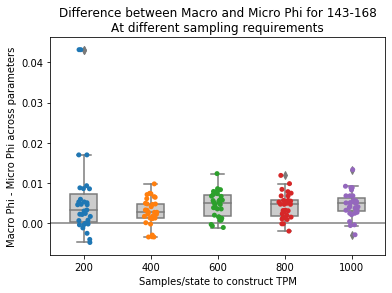

In [259]:
import pandas as pd
df = pd.DataFrame(np.transpose(np.array(results)))
ax = sns.boxplot(data=df, orient='v', color=".8", width=0.4)
ax = sns.stripplot(data=df)
ax.set_xticklabels(["200", "400", "600", "800", "1000"])
plt.title("Difference between Macro and Micro Phi for 143-168\nAt different sampling requirements")
plt.ylabel("Macro Phi - Micro Phi across parameters")
plt.xlabel("Samples/state to construct TPM")
plt.axhline(y=0, color='gray', linestyle='-')

In [260]:
np.array(results).shape

(5, 31)

In [317]:
neurons_in_bidirectionally = list(set([item for sublist in bidirectionally for item in sublist]))


In [326]:
## GET A SAMPLE OF DISCONNECTED PAIRS

from random import randint
disconnected_pairs = []
while len(disconnected_pairs) < len(bidirectionally):
    i = randint(0,len(neurons_in_bidirectionally)-1)

    j = randint(0,len(neurons_in_bidirectionally)-1)

    if i == j:
        continue
    n_0,n_1 = neurons_in_bidirectionally[min(i,j)], neurons_in_bidirectionally[max(i,j)]
    
    if (probe1_371[n_0,n_1] == 0 and probe1_371[n_1,n_0] == 0) and (n_0, n_1) not in disconnected_pairs:
       disconnected_pairs.append((n_0, n_1))

np.save("results/disconnected", disconnected_pairs)


In [327]:
## GET A SAMPLE OF UNIDIRECTIONALLY CONNECTED PAIRS
from random import randint
unidirectional_pairs = []
while len(unidirectional_pairs) < len(bidirectionally):
    i = randint(0,len(neurons_in_bidirectionally)-1)

    j = randint(0,len(neurons_in_bidirectionally)-1)

    if i == j:
        continue
    n_0,n_1 = neurons_in_bidirectionally[min(i,j)], neurons_in_bidirectionally[max(i,j)]
    
    if (probe1_371[n_0,n_1] == 0 or probe1_371[n_1,n_0] == 0) and not (probe1_371[n_0,n_1] == 0 and probe1_371[n_1,n_0] == 0) and (n_0, n_1) not in unidirectional_pairs:
       unidirectional_pairs.append((n_0, n_1))

np.save("results/unidirectional", unidirectional_pairs)


In [56]:
## GET A TOTALLY RANDOM SAMPLE of DISCONNECTED PAIRS
from random import randint
disconnected_pairs = []
not_in_bidirectionally = np.setdiff1d(list(range(370)), bidirectionally)
while len(disconnected_pairs) < len(bidirectionally):
    i = randint(0,len(not_in_bidirectionally))

    j = randint(0,len(not_in_bidirectionally))

    if i == j:
        continue
    n_0,n_1 = min(i,j), max(i,j)
    
    if (probe1_371[n_0,n_1] == 0 and probe1_371[n_1,n_0] == 0) and (n_0, n_1) not in disconnected_pairs:
       disconnected_pairs.append((n_0, n_1))

np.save("results/random_disconnected_not_bidirectionally", disconnected_pairs)


In [50]:
bidirectionally = np.loadtxt("birirectionally.txt")
neurons_in_bidirectionally = list(set([item for sublist in bidirectionally for item in sublist]))

In [48]:
# CHECK HOW MANY OF THE NEURONS IN BIDIRECTIONALLY ARE IN THE RANDOM
random_pair_indices = [64, 82, 84, 85, 102, 124, 125, 147, 163, 178, 179, 185, 186, 218, 219, 262, 274, 280, 307, 309, 338, 339, 345, 353, 367, 425, 433, 439, 505, 546, 550, 556, 576, 593, 597, 607, 633, 639, 641, 647, 701, 729, 730, 731, 732]
random_pairs = [i[2] for i in all_16_macro_micros_disconnected_random[random_pair_indices]]
neurons_in_random_pairs = list(set([item for sublist in random_pairs for item in sublist]))

In [62]:
len(np.intersect1d(neurons_in_bidirectionally, neurons_in_random_pairs))

53